Saving 1. Predict Loan Default.csv to 1. Predict Loan Default (4).csv
First 5 rows:
        LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      

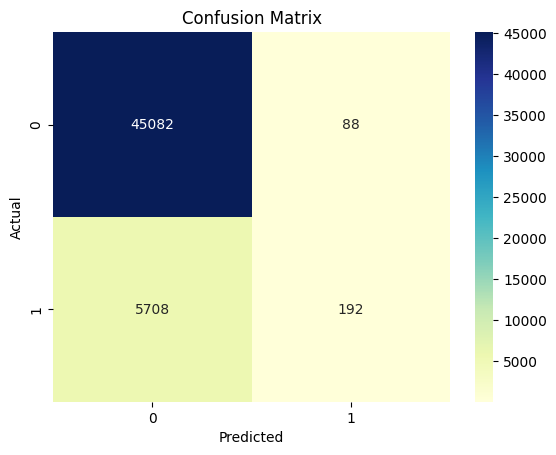

In [7]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Upload and load the dataset
from google.colab import files
uploaded = files.upload()

# Load the uploaded CSV file
df = pd.read_csv(next(iter(uploaded)))

# Step 3: Data inspection
print("First 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

# Step 4: Preprocessing

# Drop LoanID (not useful for modeling)
df.drop('LoanID', axis=1, inplace=True)

# Convert "Yes"/"No" to 1/0 for binary columns
binary_map = {'Yes': 1, 'No': 0}
df['HasMortgage'] = df['HasMortgage'].map(binary_map)
df['HasDependents'] = df['HasDependents'].map(binary_map)
df['HasCoSigner'] = df['HasCoSigner'].map(binary_map)

# Ensure target variable is numeric (just in case)
df['Default'] = df['Default'].astype(int)

# One-hot encode categorical features
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 5: Split features and target
X = df.drop('Default', axis=1)
y = df['Default']

# Step 6: Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 8: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 9: Make predictions and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
